In [ ]:
# use RNN model to forecast the stock price of 600567
# single RNN, 5 CNN, use 8 data to forecast the 9th

In [3]:
# laod the data
import pandas as pd
data = pd.read_csv('600567stockprice2024.csv')
data.head()

,序号,日期,收盘,开盘,高,低,交易量,涨跌幅
0,1,"1月 02, 2024",1.95,1.94,1.96,1.93,20.25M,0.52%
1,2,"1月 03, 2024",1.95,1.94,1.96,1.93,24.75M,0.00%
2,3,"1月 04, 2024",1.92,1.94,1.95,1.91,24.13M,-1.54%
3,4,"1月 05, 2024",1.91,1.92,1.95,1.91,27.71M,-0.52%
4,5,"1月 08, 2024",1.88,1.91,1.92,1.88,25.21M,-1.57%


In [4]:
price = data.loc[:,'收盘']
price.head()

0    1.95
1    1.95
2    1.92
3    1.91
4    1.88
Name: 收盘, dtype: float64

In [5]:
# 归一下处理
price_norm = price/max(price)
print(price_norm)

0      0.819328
1      0.819328
2      0.806723
3      0.802521
4      0.789916
         ...   
244    0.768908
245    0.785714
246    0.777311
247    0.768908
248    0.739496
Name: 收盘, Length: 249, dtype: float64


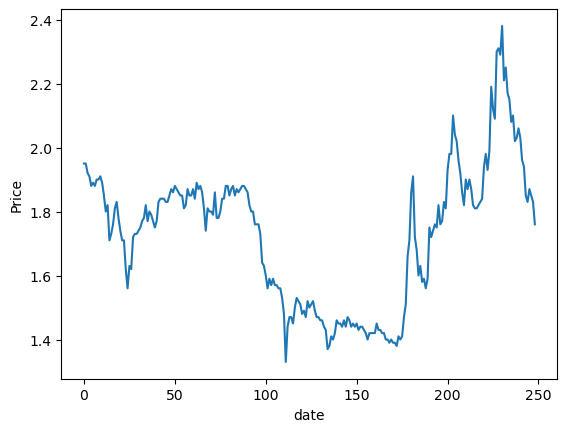

In [10]:
# visulize the data
from matplotlib import pyplot as plt
fig1 =  plt.figure()
plt.plot(price)
plt.xlabel('date')
plt.ylabel('Price')
plt.show()

In [27]:
# define x and y
# define method to extract x and y
import numpy as np
def extract_data(data, step):
    x=[]
    y=[]
    for i in range(len(data)-step):
        x.append([a for a in data[i:i+step]])
        y.append(data[i+step])
    x=np.array(x)
    x=x.reshape(x.shape[0],x.shape[1],1)
    return x,y

In [30]:
time_step = 8
x,y=extract_data(price_norm,time_step)
print(x[1,:,:])

[[0.81932773]
 [0.80672269]
 [0.80252101]
 [0.78991597]
 [0.79411765]
 [0.78991597]
 [0.79831933]
 [0.79831933]]


In [33]:
# establish the model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
# add RNN layer
model.add(SimpleRNN(units=5, input_shape=(time_step,1), activation='relu'))
# add output layer
model.add(Dense(units=1, activation='linear'))
# config the model
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [39]:
# train the model
print(x.shape,len(y))
y=np.array(y)
model.fit(x,y,batch_size=30, epochs=200)

(241, 8, 1) 241
Epoch 1/200
9/9 [==============================] - 2s 5ms/step - loss: 1.1754
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 1.1021
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0335
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.9708
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9122
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.8583
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.8074
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7602
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7155
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6732
Epoch 11/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6340
Epoch 12/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5962
Epoch 13/200
9/9 [===========================

In [40]:
# visulize the prediction
y_train_predict = model.predict(x)*max(price)
y_train = y * max(price)


8/8 [==============================] - 0s 4ms/step


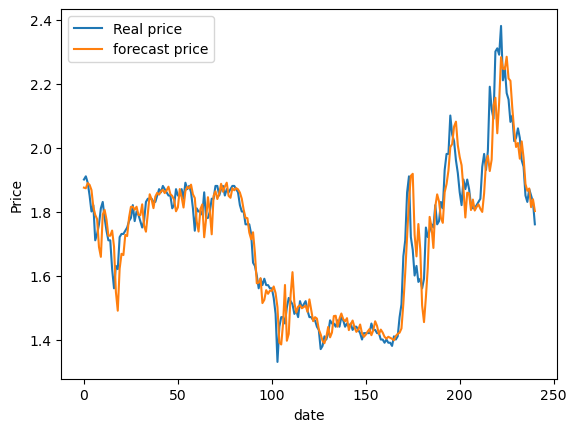

In [47]:
fig2 =  plt.figure()
plt.plot(y_train, label='Real price')
plt.plot(y_train_predict, label='forecast price')
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
# test the model
data_test = pd.read_csv('600567stockprice2024.csv')
data_test.head()

,序号,日期,收盘,开盘,高,低,交易量,涨跌幅
0,1,"1月 02, 2024",1.95,1.94,1.96,1.93,20.25M,0.52%
1,2,"1月 03, 2024",1.95,1.94,1.96,1.93,24.75M,0.00%
2,3,"1月 04, 2024",1.92,1.94,1.95,1.91,24.13M,-1.54%
3,4,"1月 05, 2024",1.91,1.92,1.95,1.91,27.71M,-0.52%
4,5,"1月 08, 2024",1.88,1.91,1.92,1.88,25.21M,-1.57%


In [51]:
price_test_norm = data_test.loc[:,'收盘']/max(price)
x_test,y_test = extract_data(price_test_norm,time_step)
print(x_test.shape,len(y_test))


(241, 8, 1) 241


In [53]:
y_test_predict = model.predict(x_test)*max(price)
print(y_test_predict.shape)

8/8 [==============================] - 0s 2ms/step
(241, 1)


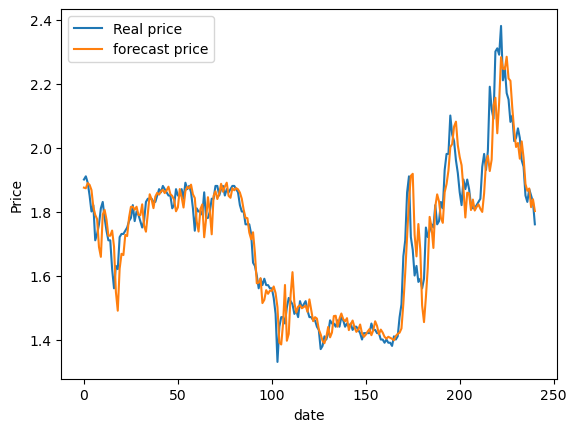

In [56]:
# visulize the predict
fig3 =  plt.figure()
plt.plot(np.array(y_test)*max(price), label='Real price')
plt.plot(y_test_predict, label='forecast price')
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
result_y_test = (np.array(y_test)*max(price)).reshape(-1,1)
result = np.concatenate((result_y_test,y_test_predict), axis=1)
print(result_y_test.shape,y_test_predict.shape,result.shape)

(241, 1) (241, 1) (241, 2)


In [72]:
result = pd.DataFrame(result, columns=['real_price','Predict price'])
result.to_csv('600567stockprice2023Output.csv')